<a href="https://colab.research.google.com/github/NehaKumari500092077/Machine-Learning-Lab/blob/main/Session_4_Assignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Lab Assignment 3**

### <font color='blue'>Objective: </font>

In this assignment, you will learn how to handle and preprocess a real-world dataset, including dealing with duplicates, missing values, and feature scaling. You'll implement the Naive Bayes classifier from scratch, selecting appropriate likelihood distributions for different feature types. You'll also compare your implementation with an existing model (MixedNB) and assess its performance using various metrics. Finally, you'll learn to effectively evaluate and visualize the results to communicate your findings.

### <font color='blue'> Task - 1 [Marks 0] </font>:
Load the [Secondary Mushroom](https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset) dataset using Pandas. This dataset has 20 features, and the target variable is binary, which indicates if the mushroom is edible or not


In [1]:
pip install ucimlrepo

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
dataset = pd.read_csv("https://archive.ics.uci.edu/static/public/848/data.csv")

#convert into dataframe
dataset = pd.DataFrame(dataset)

#display first 5 rows
dataset.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


### <font color='blue'> Task - 2 [Marks 1] </font>:
:
Check if there are duplicate entries in the data and missing values of features. Remove duplicate entries and handle entries having missing feature values using Imputation method(Like Mean, Mediaan, Mode etc).  

In [11]:
#check for duplicate value
duplicate_entry = dataset.duplicated().sum()
print(f"Number of duplicate entries: {duplicate_entry}")

#remove duplicate value
dataset = dataset.drop_duplicates()

#verify if there is any duplicate present or not
print(f"\nNumber of duplicate entries: {dataset.duplicated().sum()}")

#check missing values
missing_values = dataset.isnull().sum()
print(f"\n\nmissing values:\n\n{missing_values}")

Number of duplicate entries: 146

Number of duplicate entries: 0


missing values:

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9855
gill-spacing            25062
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51536
stem-surface            38122
stem-color                  0
veil-type               57746
veil-color              53510
has-ring                    0
ring-type                2471
spore-print-color       54597
habitat                     0
season                      0
dtype: int64


In [12]:

#select numerical features
numerical_features = dataset.select_dtypes(include = ['float64', 'int64']).columns.tolist()

#select categorical features
categorical_features = dataset.select_dtypes(include = ['object']).columns.tolist()

#replace missing value with the mean for continous features
for col in categorical_features:
  mode = dataset[col].mode()[0]
  dataset[col].fillna(mode, inplace=True)

#replace missing value with the mode for categorical features
for col in numerical_features:
  mean = dataset[col].mean()
  dataset[col].fillna(mean, inplace=True)


#verify if there is any missing values left
print(dataset.isnull().sum())



class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64


### <font color='blue'> Task - 3 [Marks 3] </font>:

1.Preprocess the dataset as required, i.e. feature scaling or standardization

2.Is the dataset balanced or imbalanced?

3.Split data into training and test set

In [13]:
#check whether dataset provided is balanced or imbalance
#count the number of instance present for each class
instance_count_of_each_class = dataset['class'].value_counts().sort_index()
for class_label, count in instance_count_of_each_class.items():
    print(f"Class {class_label}: {count} instances")

Class e: 27181 instances
Class p: 33742 instances


The number of instances for class e and class p is 27181 and 33742 as number of instances is not equal for class e and class p. So, The provided dataset is imbalnced.

In [14]:
#preprocessing

#create object for LabelEncoder
label_encoder = LabelEncoder()

#apply label encoding to each categorical features
for col in categorical_features:
  dataset[col] = label_encoder.fit_transform(dataset[col])

#feature scaling or standardization
scaler = StandardScaler()

#apply scaling on the numerical features
dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])



In [8]:
#Split data into training and test set
X = dataset.drop('class', axis = 1)
Y = dataset['class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)


### <font color='blue'> Task - 4 [Marks 7] </font>:

Implement Naive Bayes’ classifier from scratch on this dataset, by appropriately choosing the likelihood distribution for each feature. This dataset has mixed feature types (i.e. continuous and categorical features), and the likelihood distribution of each feature must consider the corresponding feature type. Mention the type of distribution you chose for each feature’s likelihood.  


In [23]:
class NaiveBayesClassifier:


  def __init__(self):
    # Initialize dictionaries to store prior probabilities and likelihoods probabilities
    self.prior_probability = {} # Prior probabilities for each class
    self.likelihood_probability = {}  # Likelihoods for feature values given each class
    self.categorical_features = categorical_features
    self.numerical_features = numerical_features



  def fit(self, X, Y):
    # Identify unique classes from the training data
    self.no_of_classes = np.unique(Y)

    # find prior probabilities and likelihoods probabilities for each class
    for c in self.no_of_classes:

      # Compute prior probabilities
      filter_rows = X[Y == c] #filter the rows in the dataset which belong to current class 'c'
      total_instances_count = len(Y) #total number of instances
      self.prior_probability[c] = len(filter_rows) / total_instances_count

      # Initialize dictionary to store likelihood of each feature give class 'c'
      self.likelihood_probability[c] = {}

      # Iterate over each columns(features) in the dataset
      for col in X.columns:

        #check if the current column(feature) is categorical
        if col in self.categorical_features:
          self.likelihood_probability[c][col] = self.calculate_categorical_likelihood(filter_rows[col])
        elif col in self.numerical_features:
          self.likelihood_probability[c][col] = self.calculate_continuous_likelihood(filter_rows[col])




  def calculate_categorical_likelihood(self, feature):
    # count the frequency of each category in the feature and store in dictonary
    category_count = feature.value_counts().to_dict()

    # sums the total no. of occurence/frequency across all categories
    total_count = sum(category_count.values())

    smooth_probability = {}
    for key, value in category_count.items():
      # Apply Lalace Smoothing
      value = (value + 1) / (total_count + len(category_count))
      # Store the probability after applying Lalace Smoothing
      smooth_probability[key] = value

    return smooth_probability



  def calculate_continuous_likelihood(self, feature):
    # Calculate mean and standard deviation
    mean = feature.mean()
    standard_deviation = feature.std()

    return {'mean': mean, 'standard_deviation': standard_deviation}



  def calculate_gaussian_probability(self, x, mean, standard_deviation):
    # Calculate the probability density of a continuous feature using the Gaussian (normal) distribution.
    exponent_val = np.exp(-((x - mean) ** 2 / (2 * standard_deviation ** 2)))
    probability_density_function = (1 / (np.sqrt(2 * np.pi) * standard_deviation)) * exponent_val

    return probability_density_function




  def predict(self, X):
    # List to store the predicted class for each sample
    predictions = []

    for i in range(X.shape[0]):
      # Dictionary to store the posterior probabilities for each class.
      posteriors = {}

      # Iterate over each class to calculate  its posterior probability.
      for c in self.no_of_classes:
        prior = np.log(self.prior_probability[c])
        likelihood = 0 # Initialize likelihood for current class 'c

        for col in X.columns:
          if col in self.categorical_features:
            likelihood += np.log(self.likelihood_probability[c][col].get(X.iloc[i][col], 1 / (len(X) + 1)))
          elif col in self.numerical_features:
            mean = self.likelihood_probability[c][col]['mean']
            standard_deviation = self.likelihood_probability[c][col]['standard_deviation']
            likelihood += np.log(self.calculate_gaussian_probability(X.iloc[i][col], mean, standard_deviation))

        posteriors[c] = prior + likelihood

      predictions.append(max(posteriors, key=posteriors.get))

    return predictions






### <font color='blue'> Task - 5 [Marks 2] </font>:

Report the classification performance using the appropriate metrics (accuracy, precision, recall, confusion matrix, AUPRC) using suitable plots.

Accuracy for Custom Naive Bayes Classifier is:  0.7433
Precision for Custom Naive Bayes Classifier is:  0.7372
Recall for Custom Naive Bayes Classifier is:  0.8389 



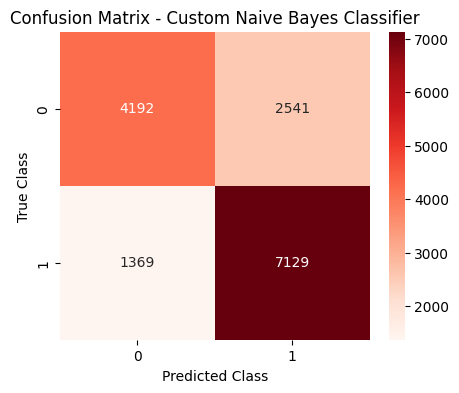

AUPRC for Custom Naive Bayes Classifier is:  0.8330


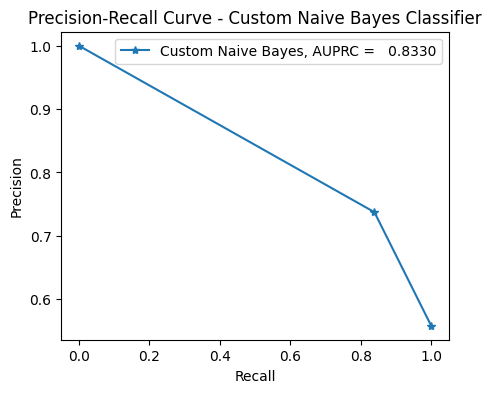

In [27]:
#instanciate and fit the mixed naive bayes model
model_custom = NaiveBayesClassifier()
model_custom.fit(X_train, Y_train)

#make prediction
Y_pred_custom = model_custom.predict(X_test)

#compute classification performance
accuracy_custom  = accuracy_score(Y_test, Y_pred_custom)
precision_custom = precision_score(Y_test, Y_pred_custom)
recall_custom = recall_score(Y_test, Y_pred_custom)
print(f"Accuracy for Custom Naive Bayes Classifier is: {accuracy_custom: .4f}")
print(f"Precision for Custom Naive Bayes Classifier is: {precision_custom: .4f}")
print(f"Recall for Custom Naive Bayes Classifier is: {recall_custom: .4f} \n")

#compute confusion matrix
confusion_matrix_custom = confusion_matrix(Y_test, Y_pred_custom)

#plot confusion matrix
plt.figure(figsize = (5, 4))
sns.heatmap(confusion_matrix_custom, annot = True, fmt = 'd', cmap = 'Reds')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix - Custom Naive Bayes Classifier')
plt.show()

#compute AUPRC
precision_vals_custom, recall_vals_custom, _ = precision_recall_curve(Y_test, Y_pred_custom)
auprc_custom = auc(recall_vals_custom, precision_vals_custom)
print(f"AUPRC for Custom Naive Bayes Classifier is: {auprc_custom: .4f}")

#plot precision recall curve
plt.figure(figsize = (5, 4))
plt.plot(recall_vals_custom, precision_vals_custom, marker = '*', label = f'Custom Naive Bayes, AUPRC =  {auprc_custom: .4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Custom Naive Bayes Classifier')
plt.legend()
plt.show()

### <font color='blue'> Task - 6 [Marks 5] </font>:
Fit a Naive Bayes’ model for this dataset using MixedNB (from the package https://pypi.org/project/mixed-naive-bayes/)



In [29]:
pip install mixed-naive-bayes

Accuracy for Mixed Naive Bayes is:  0.6079
Precision for Mixed Naive Bayes is:  0.7860
Recall for Mixed Naive Bayes is:  0.4084


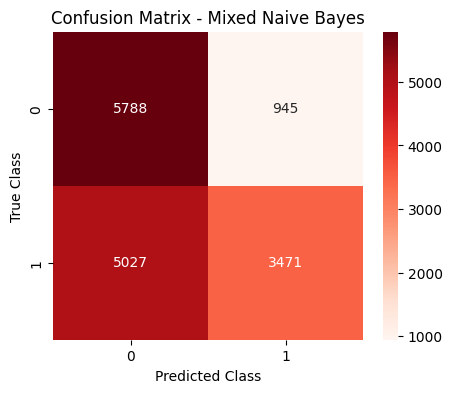

AUPRC for Mixed Naive Bayes is:  0.7623


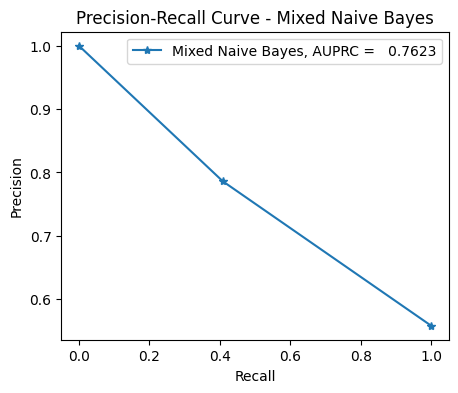

In [30]:

from mixed_naive_bayes import MixedNB

#instanciate and fit the mixed naive bayes model
model_mixedNB = MixedNB()
model_mixedNB.fit(X_train, Y_train)

#make prediction
Y_pred_mixedNB = model_mixedNB.predict(X_test)

#compute classification performance
accuracy_mixedNB  = accuracy_score(Y_test, Y_pred_mixedNB)
precision_mixedNB = precision_score(Y_test, Y_pred_mixedNB)
recall_mixedNB = recall_score(Y_test, Y_pred_mixedNB)
print(f"Accuracy for Mixed Naive Bayes is: {accuracy_mixedNB: .4f}")
print(f"Precision for Mixed Naive Bayes is: {precision_mixedNB: .4f}")
print(f"Recall for Mixed Naive Bayes is: {recall_mixedNB: .4f}")

#compute confusion matrix
confusion_matrix_mixedNB = confusion_matrix(Y_test, Y_pred_mixedNB)

#plot confusion matrix
plt.figure(figsize = (5, 4))
sns.heatmap(confusion_matrix_mixedNB, annot = True, fmt = 'd', cmap = 'Reds')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix - Mixed Naive Bayes')
plt.show()

#compute AUPRC
precision_vals_mixedNB, recall_vals_mixedNB, _ = precision_recall_curve(Y_test, Y_pred_mixedNB)
auprc_mixedNB = auc(recall_vals_mixedNB, precision_vals_mixedNB)
print(f"AUPRC for Mixed Naive Bayes is: {auprc_mixedNB: .4f}")

#plot precision recall curve
plt.figure(figsize = (5, 4))
plt.plot(recall_vals_mixedNB, precision_vals_mixedNB, marker = '*', label = f'Mixed Naive Bayes, AUPRC =  {auprc_mixedNB: .4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Mixed Naive Bayes')
plt.legend()
plt.show()

### <font color='blue'> Task - 7 [Marks 2] </font>:

Compare the performance obtained by your implementation with that obtained using MixedNB

Accuracy for Custom Naive Bayes Classifier is:  0.7433
Accuracy for Mixed Naive Bayes is:  0.6079 


Precision for Custom Naive Bayes Classifier is:  0.7372
Precision for Mixed Naive Bayes is:  0.7860 


Recall for Custom Naive Bayes Classifier is:  0.8389
Recall for Mixed Naive Bayes is:  0.4084 




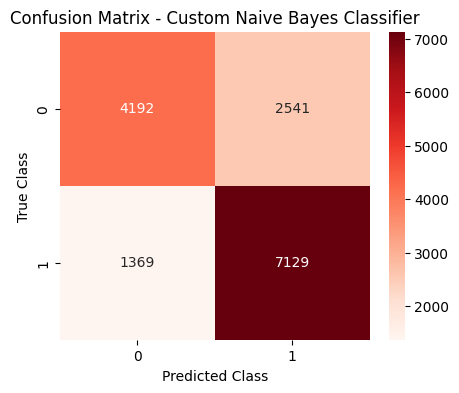

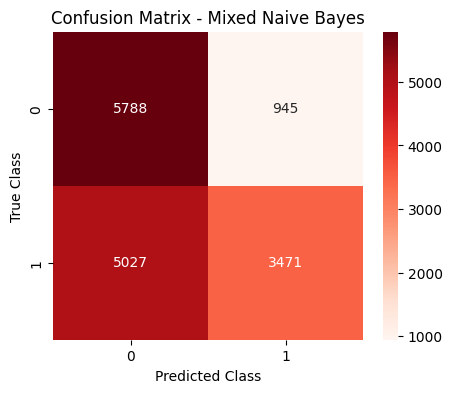

AUPRC for Custom Naive Bayes Classifier is:  0.8330
AUPRC for Mixed Naive Bayes is:  0.7623


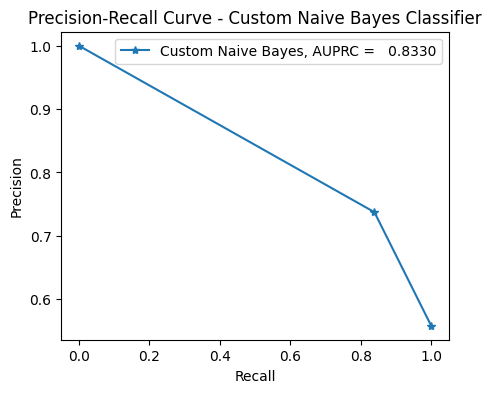

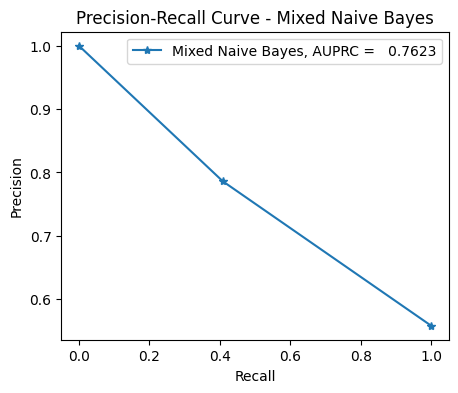

In [34]:
#compare the result of Custom Naive Bayes Classifier and Mixed Naive Bayes (library)

#comparision between Accuracy
print(f"Accuracy for Custom Naive Bayes Classifier is: {accuracy_custom: .4f}")
print(f"Accuracy for Mixed Naive Bayes is: {accuracy_mixedNB: .4f} \n\n")

#comparision between Precision
print(f"Precision for Custom Naive Bayes Classifier is: {precision_custom: .4f}")
print(f"Precision for Mixed Naive Bayes is: {precision_mixedNB: .4f} \n\n")

#comparision between Recall
print(f"Recall for Custom Naive Bayes Classifier is: {recall_custom: .4f}")
print(f"Recall for Mixed Naive Bayes is: {recall_mixedNB: .4f} \n\n")

#comparision between Confusion Matrix

#plot confusion matrix for Custom Naive Bayes Classsifier
plt.figure(figsize = (5, 4))
sns.heatmap(confusion_matrix_custom, annot = True, fmt = 'd', cmap = 'Reds')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix - Custom Naive Bayes Classifier')
plt.show()

#plot confusion matrix for Mixed Naive Bayes
plt.figure(figsize = (5, 4))
sns.heatmap(confusion_matrix_mixedNB, annot = True, fmt = 'd', cmap = 'Reds')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix - Mixed Naive Bayes')
plt.show()

#comparision between AUPRC
print(f"AUPRC for Custom Naive Bayes Classifier is: {auprc_custom: .4f}")
print(f"AUPRC for Mixed Naive Bayes is: {auprc_mixedNB: .4f}")

#plot precision recall curve for Custom Naive Bayes Classsifier
plt.figure(figsize = (5, 4))
plt.plot(recall_vals_custom, precision_vals_custom, marker = '*', label = f'Custom Naive Bayes, AUPRC =  {auprc_custom: .4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Custom Naive Bayes Classifier')
plt.legend()
plt.show()

#plot precision recall curve for Mixed Naive Bayes
plt.figure(figsize = (5, 4))
plt.plot(recall_vals_mixedNB, precision_vals_mixedNB, marker = '*', label = f'Mixed Naive Bayes, AUPRC =  {auprc_mixedNB: .4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Mixed Naive Bayes')
plt.legend()
plt.show()


